In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
29995,45,Male,Masters,14,Married,State-gov,Prof-specialty,60,>50K,1
29996,33,Male,HS-grad,9,Married,Private,Machine-op-inspct,40,>50K,1
29997,47,Male,Prof-school,15,Married,Private,Prof-specialty,55,>50K,1
29998,32,Female,Some-college,10,Never-married,Private,Adm-clerical,40,<=50K,0


In [3]:
print(len(df))
df.head()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [4]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [6]:
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation'] 
cont_cols = ['age', 'hours-per-week']  
y_col = ['label']  


print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


In [7]:
for col in cat_cols:
    df[col] = df[col].astype('category')

df[cat_cols].dtypes

sex               category
education         category
marital-status    category
workclass         category
occupation        category
dtype: object

In [8]:
df = shuffle(df, random_state=101)
df.reset_index(drop=True,inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


In [9]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,30,Male,Some-college,10,Married,Private,Transport-moving,80,>50K,1
1,69,Male,Masters,14,Married,Private,Prof-specialty,25,<=50K,0
2,49,Male,HS-grad,9,Married,Private,Transport-moving,48,>50K,1
3,43,Male,Some-college,10,Married,Private,Machine-op-inspct,40,<=50K,0
4,42,Male,HS-grad,9,Married,Private,Exec-managerial,50,>50K,1


In [10]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, (size+1)//2) for size in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [11]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], axis=1).astype('int8')
print(cats[:5])

[[ 1 13  1  2 11]
 [ 1 11  1  2  7]
 [ 1 10  1  2 11]
 [ 1 13  1  2  5]
 [ 1 10  1  2  2]]


In [12]:
cat_tensor = torch.tensor(cats, dtype=torch.int64)  
conts = np.stack([df[col].values for col in cont_cols], axis=1).astype('int64')
print(conts[:5])

[[30 80]
 [69 25]
 [49 48]
 [43 40]
 [42 50]]


In [13]:
cont_tensor = torch.tensor(conts, dtype=torch.float32)
print(cont_tensor.dtype) 

torch.float32


In [14]:
y = torch.tensor(df[y_col].values, dtype=torch.long).view(-1)  # shape (30000,)
print(y.shape, y.dtype)

torch.Size([30000]) torch.int64


In [15]:
b = 30000  
t = 5000  
train_n = b - t

cat_train = cat_tensor[:train_n].clone()
cat_test  = cat_tensor[train_n: b].clone()

con_train = cont_tensor[:train_n].clone()
con_test  = cont_tensor[train_n: b].clone()

y_train = y[:train_n].clone()
y_test  = y[train_n: b].clone()

print(cat_train.shape, con_train.shape, y_train.shape)
print(cat_test.shape, con_test.shape, y_test.shape)

torch.Size([25000, 5]) torch.Size([25000, 2]) torch.Size([25000])
torch.Size([5000, 5]) torch.Size([5000, 2]) torch.Size([5000])


In [16]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x


In [17]:
torch.manual_seed(33)

In [18]:
model = TabularModel(emb_szs, n_cont=len(cont_cols), out_sz=2, layers=[50], p=0.4)
print(model)

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
import time
start_time = time.time()
epochs = 300
losses = []

for i in range(epochs):
    i += 1
    model.train()
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    if i % 25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}')
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epoch:   1  loss: 0.81006557
epoch:  26  loss: 0.59268230
epoch:  51  loss: 0.51451385
epoch:  76  loss: 0.46563661
epoch: 101  loss: 0.43257797
epoch: 126  loss: 0.40289918
epoch: 151  loss: 0.37922528
epoch: 176  loss: 0.36555341
epoch: 201  loss: 0.35053301
epoch: 226  loss: 0.34021521
epoch: 251  loss: 0.33193547
epoch: 276  loss: 0.32308403
epoch: 300  loss: 0.31535852

Duration: 21 seconds


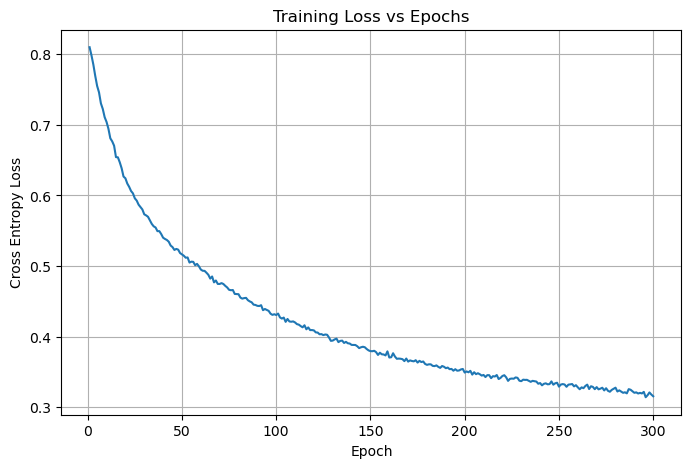

In [21]:
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Training Loss vs Epochs')
plt.grid(True)
plt.show()

In [22]:
model.eval()
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)

print(f'CE Loss: {loss:.8f}')

CE Loss: 0.28875524


In [23]:
preds = torch.argmax(y_val, dim=1)
correct = (preds == y_test).sum().item()
total = y_test.size(0)
pct = correct / total * 100.0
print(f'{correct} out of {total} = {pct:.2f}% correct')

4406 out of 5000 = 88.12% correct


In [24]:
def predict_new_input():
    model.eval()
    age = int(input("What is the person's age? (18-90) "))
    sex = input("What is the person's sex? (Male/Female) ").strip()
    education = input("What is the person's education level? ").strip()
    educ_num = int(input("What is the person's education-num? (3-16) (unused) "))
    marital = input("What is the person's marital status? ").strip()
    workclass = input("What is the person's workclass? ").strip()
    occupation = input("What is the person's occupation? ").strip()
    hours = int(input("How many hours/week are worked? (20-90) "))

    try:
        cat_vals = [
            df['sex'].cat.categories.get_indexer([sex])[0],
            df['education'].cat.categories.get_indexer([education])[0],
            df['marital-status'].cat.categories.get_indexer([marital])[0],
            df['workclass'].cat.categories.get_indexer([workclass])[0],
            df['occupation'].cat.categories.get_indexer([occupation])[0],
        ]
    except Exception as e:
        print("Error mapping categorical values. Make sure you typed values exactly as in dataset categories.")
        raise

    cat_tensor_single = torch.tensor([cat_vals], dtype=torch.int64)
    cont_tensor_single = torch.tensor([[age, hours]], dtype=torch.float32)

    with torch.no_grad():
        out = model(cat_tensor_single, cont_tensor_single)
        pred = torch.argmax(out, dim=1).item()
    print(f"\nThe predicted label is {pred} (0: <=50K, 1: >50K)")

In [25]:
predict_new_input()

What is the person's age? (18-90) 30
What is the person's sex? (Male/Female) Male
What is the person's education level? Some-college
What is the person's education-num? (3-16) (unused) 10
What is the person's marital status? Married
What is the person's workclass? Private	
What is the person's occupation? Transport-moving	
How many hours/week are worked? (20-90) 80

The predicted label is 1 (0: <=50K, 1: >50K)
